<a href="https://colab.research.google.com/github/KazGet/Laboratory-work/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BA%D0%BE%D0%BC%D0%BC%D0%B8%D0%B2%D0%BE%D1%8F%D0%B6%D1%91%D1%80%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Генетический алгоритм, лабораторная***


**Введение**
---

**Коммивояжёр** (фр. commis voyageur) — бродячий торговец. **Задача коммивояжёра** — одна из самых известных задач комбинаторной оптимизации. Важная задача транспортной логистики, отрасли, занимающейся планированием транспортных перевозок. Коммивояжёру, чтобы распродать нужные и не очень нужные в хозяйстве товары, следует объехать **n** городов и в конце концов вернуться в исходный город. Требуется определить наиболее выгодный маршрут объезда. В качестве меры выгодности маршрута (точнее говоря, невыгодности) может служить суммарное время в пути, суммарная стоимость дороги, или, как в данной работе длина маршрута.

Задача коммивояжёра может быть решена перебором всех вариантов объезда и выбором оптимального. Проблема заключается в том, что количество возможных маршрутов очень быстро возрастает с ростом **n** (оно равно **n!** — количеству способов упорядочения пунктов). К примеру, для 100 пунктов количество вариантов будет представляться 158-значным числом! Мощная ЭВМ, способная перебирать миллион вариантов в секунду, будет биться с задачей на протяжении примерно $3⋅10^{144}$ лет.

Доказано, что не существует алгоритма решения, имеющего степенную сложность (то есть требующего порядка $n^a$ операций для некоторого **a**) — любой алгоритм будет хуже.

В таком случае следует отказаться от попыток отыскать точное решение задачи коммивояжёра и сосредоточиться на поиске приближённого — пускай не оптимального, но хотя бы близкого к нему. В виду большой практической важности задачи полезными будут и приближённые решения.

**Генетический алгоритм** – это разновидность эволюционного алгоритма, который используется для решения задач оптимизации и моделирования путём случайного подбора и комбинирования параметров. Идея генетических алгоритмов основана на эволюционной теории Чарльза Дарвина. Этот алгоритм симулирует процесс естественного отбора, когда более сильные особи из популяции переживают более слабых и производят следующее поколение особей. Данный алгоритм использует эволюционные принципы наследственности, изменчивости и естественного отбора.

**Постановка задачи.** Данная лабораторная работа посвящена рассмотрению решения геометрической задачи коммивояжера на основе генетического алгоритма. На вход данному алгоритму подается некоторое количество городов и их координаты **X**, **Y** на плоскости. Алгоритм должен построить кратчайший маршрут, проходящий через все города с возвращением в исходную точку.

Расстояние между городами считается по евклидовой метрике.

Дополнительные материалы
---

1. [В. Г. Cпицын, Ю. Р. Цой ПРИМЕНЕНИЕ ГЕНЕТИЧЕСКОГО АЛГОРИТМА
ДЛЯ РЕШЕНИЯ ЗАДАЧ ОПТИМИЗАЦИИ](https://portal.tpu.ru/SHARED/e/EXCEIBOT/academic/ISTab/Lab2.pdf)
2. Видео лекция по генетическому алгоритму:  [Генетический алгоритм (Кирсанов М.Н)](https://www.youtube.com/watch?v=ttsZV01aYYU).
3. Учебник: [Люк С. Основы метаэвристик. Перевод.](http://qai.narod.ru/GA/metaheuristics.html)
4. Видео 2: [Видео 2. Генетический алгоритм для задачи о коммивояжера](https://www.youtube.com/watch?v=ufAHNtZkO_A&ab_channel=NataliiaTuzhilkina)

**Постановка задачи**
---

Зададим первоначальные условия задачи:

1) Выберем количество городов.

2) Расположим города случайным образом на плоскости.

In [ ]:
import numpy as np

number_cities = 15 # количество городов
list_cities = np.random.random([number_cities, 2]) # спискок координат городов

Выведем изображение с местоположением городов.

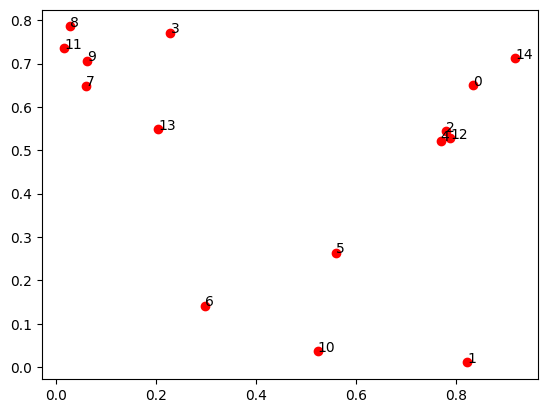

In [ ]:
import matplotlib.pyplot as plt

# нарисуем города
plt.scatter(list_cities[:, 0], list_cities[:, 1], c='red')

# пронумеруем города
for i in range(number_cities):
  plt.annotate(i, (list_cities[i][0], list_cities[i][1]))
plt.show()

**Маршрут**
---

**Маршрут** в данной реализации является массивом. Данный массив содержит number_cities элементов, каждый элемент массива это номер города. Маршрут проходит через города в соответствии с расположением городов в массиве и возвращается в стартовый город (первый город в массиве).

Где number_cities - это количество городов.

Ниже приведен пример построения кратчайшего маршрута проходящего через 10 точек:

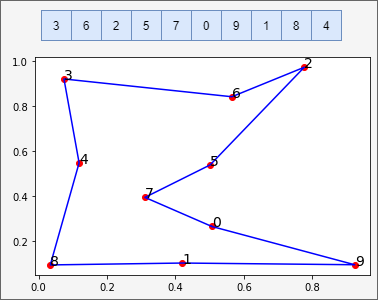

**Функция отрисовки маршрута**

Ниже представлена функция, позволяющая вывести маршрут в виде изображения. На данном изображении можно увидеть местоположение городов, номера городов и маршрут.

На вход данной функции подается список городов и маршрут.

In [ ]:
# нарисовать маршрут
def route_image(list_cities, route):
  # пронумеруем города
  for i in range(number_cities):
    plt.annotate(i, (list_cities[i][0], list_cities[i][1]), fontsize=14)

  # нарисуем города
  plt.scatter(list_cities[:, 0], list_cities[:, 1], c='red')

  # нарисуем маршрут
  x = [list_cities[route[-1]][0]]
  y = [list_cities[route[-1]][1]]
  for i in range(len(route)):
    x.append(list_cities[route[i]][0])
    y.append(list_cities[route[i]][1])
  plt.plot(x, y, c='blue')

  # выведем изображение
  plt.show()

Сгенерируем и выведем случайный маршрут.

Маршрут: [14  3  0  1  4  9 14 12 11 11  8  6  3 13  5]


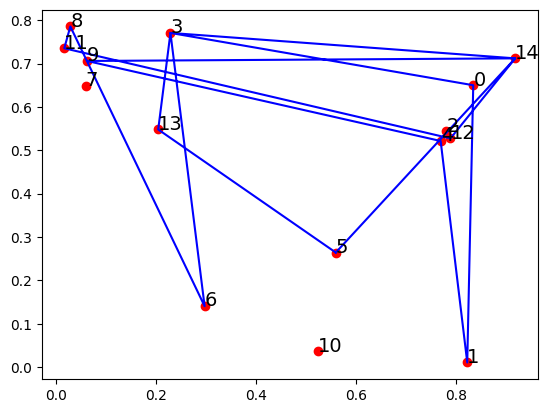

In [ ]:
route = np.random.randint(number_cities, size=number_cities) # сгенерированный маршрут
print("Маршрут:", route)
route_image(list_cities, route)

Из рисунка можно увидеть, что при генерации маршрута случайным образом может возникнуть ситуация, когда часть городов останутся пропущенными или посещенными несколько раз.

**Оценка качества маршрута**
---

**Функция оценки качества**

Данная функция позволяет оценить качество построенного маршрута. В данной постановке задачи расстояние между городами и длина маршрута считаются по евклидовой метрике. Также будем давать штраф за не посещение города, т.к. по условию задачи необходимо посетить все города, а маршрут может не содержать некоторых городов.

Формула евклидова расстояния:
$$d(p, q)=\sqrt{\sum_{i=1}^n {(p_i - q_i)}^2},$$

где ***p*** и ***q*** - координаты городов.

На вход данной функции подается список городов (list_cities) и маршрут (route).

**Задание**: Вычислите длину маршрута по евклидовой метрике.

In [ ]:
def route_length(list_cities, route):
  # штраф за не посещение города
  length_penalty = 0
  for i in range(len(list_cities)):
    if i not in route:
      length_penalty += 10

  # длина маршрута
  length = 0
  for i in range(len(route) - 1):
        p = np.array(list_cities[route[i]])
        q = np.array(list_cities[route[i + 1]])
        length += np.linalg.norm(p - q)  # это тоже евклидово расстояние
  final = length_penalty + length
  return np.array(final)

Оценим качество ранее сгенерированного маршрута и выведем его.

Качество маршрута:  37.136807732006446
Маршрут:  [14  3  0  1  4  9 14 12 11 11  8  6  3 13  5]


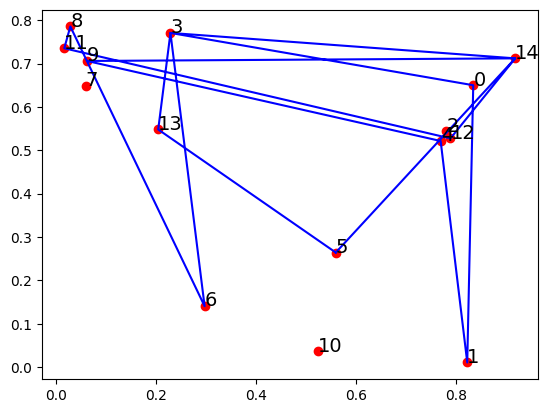

In [ ]:
print("Качество маршрута: ", route_length(list_cities, route))
print("Маршрут: ", route)
route_image(list_cities, route)

**Генетический алгоритм**
---

Процесс обучения генетического алгоритма можно разделить на 4 этапа:
1. Создание начальной популяции
2. Оценка качества особей
3. Отбор наиболее сильных решений
4. Мутация и/или скрещивание. Формирование нового поколения

Основные этапы генетического алгоритма представлены на рисунке ниже:

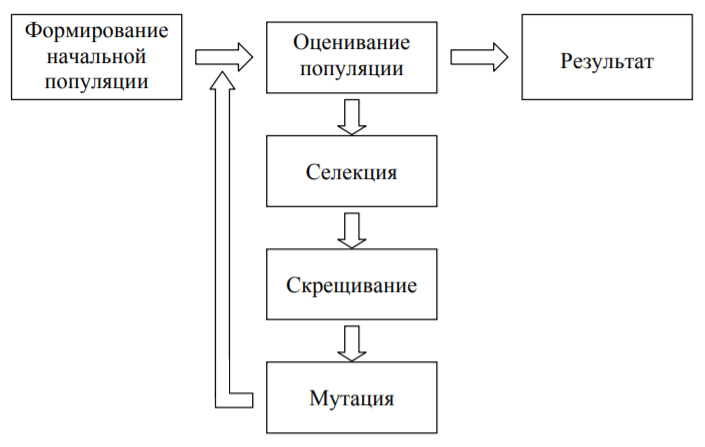

Процесс начинается с набора **особей** (например, случайные маршруты), такой набор называется **популяцией**. Каждая **особь** — это решение задачи, которая была поставлена. Особь характеризуется набором параметров (переменных), которые называют **генами** (например, номера городов). Гены объединены в одну строку и формируют **хромосому** — решение задачи.

**1. Создание начальной популяции**

Создадим начальную популяцию из случайных маршрутов. Случайный маршрут, как правило, является плохим решением данной задачи. Повторное посещение городов в данной поставноке задачи не требуется. Генерация случайных маршрутов без повторного посещения городов позволит улучшить их качество, от того на сколько качественный маршруты будут сгенерированы в начальной популяции зависит скорость схождения алгоритма и конечное качество решения.

Сгенерируем несколько случайных маршрутов без повторного посещения городов и выберем лучший.

In [ ]:
number_routes = 100 # количество маршрутов (особей)

# генерация маршрутов без повторений
routes = []
for i in range(number_routes):
  routes.append(np.random.permutation(number_cities))
routes = np.array(routes)

**2. Оценка качества особей. Функция приспособленности.**

Целью данной операции является оценка качества особей для последующего отбора наиболее приспособленных из них.

На вход данной функции подается список особей. Данная функция оценивает и выводит качество всех особей (качество всех маршрутов).

**Задание**: рассчитайте приспособленность каждой особи в популяции (список routes) и запишите полученный результат в список (length_penalty).

In [ ]:
# качество особей (маршрутов)
def quality(list_cities, routes):
    length_penalty = np.zeros(len(routes))
    for i in range(len(routes)):
        length_penalty[i] = route_length(list_cities, routes[i])
    return length_penalty

Оценим начальную популяцию и найдем самый короткий и качественный сгенерированный маршрут. Затем выведем его.

Маршрут:  [ 1  4 10  9  7  3 11 13  0  2 14 12  6  5  8]
Качество маршрута: 5.478189544998298


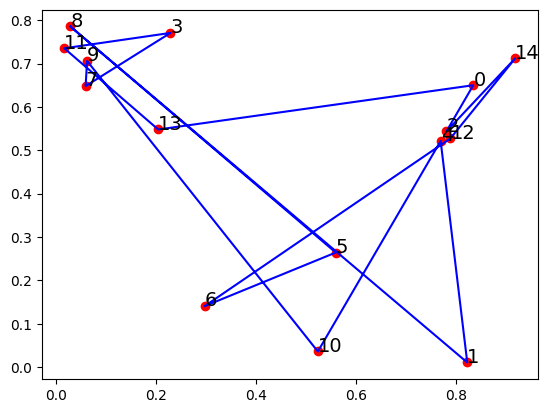

In [ ]:
length_penalty = quality(list_cities, routes)

min_route = routes[np.argmin(length_penalty)]
print("Маршрут: ", min_route)
print("Качество маршрута:", route_length(list_cities, min_route))
route_image(list_cities, min_route)

Случайный маршрут, построенный без повторного посещения городов, в среднем значительно лучше полностью случайного маршрута.

При постановке задачи с малым количествов городов (например 8) и достаточном количестве сгенерированных маршрутов (например 500), решение задачи может быть найдено уже на данном этапе. При решении задачи с большим количеством городов, требуется использование других подходов. Так можно использовать полный перебор вариантов с проверкой всех возможных решений, но данный подход является ресурсозатратным и может не позволить найти решение задачи за приемлемое время. Использование генетического алгоритма может ускорить поиск решения данной задачи, но не гарантирует нахождения решения.

**3. Отбор наиболее сильных решений. Селекция**

Идея селекции особей заключается в том, чтобы отобрать наиболее сильные решения и передать их гены в следующее поколение, на основе отсева наиболее слабых особей из популяции.

В данном случае мы не будем выделять селекцию как отдельный этап, в данной реализации генетического алгоритма на каждой итерации мы будем заменять одну наименее приспособленную особь на новую. Новая особь получается в результате операции скрещивания или мутации случайных особей популяции.

**4.1. Мутация**

Операция мутация особи заключается в случайном изменении ее генов, например: перестановка городов местами, генерация новой случайной части маршрута и т.д. Мутация особи может как улучшить существующий маршрут, так и ухудшить его. Но делая случайные изменения и сохраняя положительные мутации мы можем постепенно найти более качественное решение задачи.

На изображении ниже можно увидеть пример положительной мутации.

Пример положительной мутации особи (маршрута):
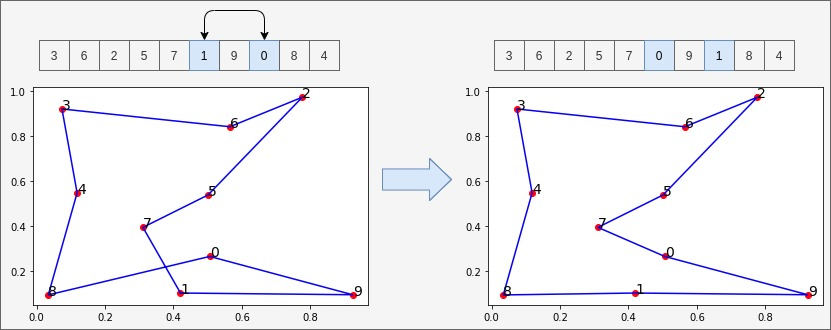

**Задание**: реализуйте операцию мутации (можете попробовать предложить свой вариант).

In [ ]:
# мутация маршрута
def exchange_mutation(route):
  """Мутация обменом"""
  n = len(route)
  idx1 = np.random.randint(0, n+1) #Случайный индекс
  idx2_choices = np.delete(np.arange(n), idx1)  # Убираем idx1 из возможных индексов
  idx2 = np.random.choice(idx2_choices)
  route[idx1], route[idx2] = route[idx2], route[idx1]
  return route

def conversion_mutation(route):
  """Мутация обращением"""
  n = len(route)
  a = np.random.randint(0, n+1)#Левый индекс
  b = np.random.choice(np.delete(np.arange(n), a))#Правый индекс
  if b<a:
    a, b = b, a
  route[a:b] = np.flip(route[a:b])
  return route

def shuffle_mutation(route):
    """Мутация перемешкой"""
    n = len(route)
    a = np.random.randint(0, n)  # безопасно
    b = np.random.choice(np.delete(np.arange(n), a))
    if b < a:
        a, b = b, a
    route[a:b] = np.random.permutation(route[a:b])  # используем permutation вместо shuffle
    return route



**4.2. Скрещивание**

Операция скрещивания заключается в создании новой особи на основе двух особей родителей, например: объединение двух случайных участков геномов, перенос некоторой последовательности генов из одной особи в другую и т.д. Целью данной операции является объединение положительных качеств особей родителей, которое позволит получить новую особь с более качественным геномом.

Пример успешного скрещивания двух особей (скрещивание маршрутов):

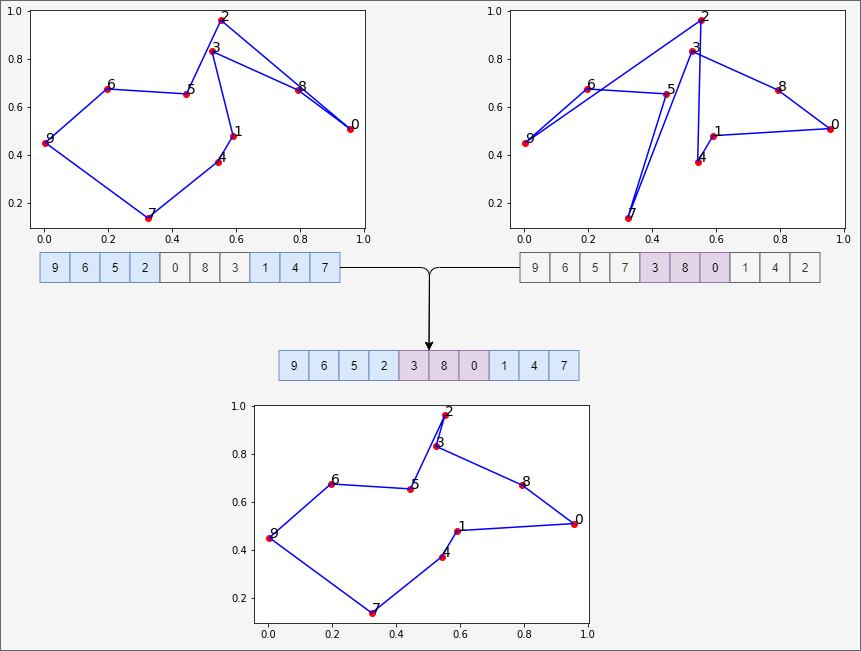

**Задание**: реализуйте операцию скрещивания (можете попробовать предложить свой вариант).

In [ ]:
# скрещивание

def one_point_crossover_tsp(route_1, route_2):
    """Одноточечное скрещивание"""
    n = len(route_1)
    point = np.random.randint(1, n)

    # Часть от первого родителя
    route_3 = route_1[:point].copy()

    # Добавим из второго родителя только то, чего ещё нет
    for gene in route_2:
        if gene not in route_3:
            route_3.append(gene)
    return route_3

def k_point_crossover_tsp(route_1, route_2):
    """Двухточечное скрещивание"""
    n = len(route_1)
    a = np.random.randint(0, n)
    b = np.random.choice(np.delete(np.arange(n), a))
    if b < a:
        a, b = b, a

    # Середина из второго родителя
    middle = route_2[a:b]

    # Остальное добираем из первого родителя, исключая уже вставленные
    head = [gene for gene in route_1 if gene not in middle][:a]
    tail = [gene for gene in route_1 if gene not in middle][a:]

    # Объединяем в потомка
    route_3 = head + middle + tail
    return route_3

def uniform_crossbreeding(route_1, route_2):
  """Одноточечное скрещивание"""
  n = len(route_1)
  point = np.random.randint(1, n)#выбрать точку рассечения >0; <n
  route_3 = np.concatenate((route_1[0:point], route_2[point:]))
  return route_3

def uniform_crossbreeding(route_1, route_2):
    n = len(route_1)
    mask = np.random.randint(0, 2, size=n) #Например, mask = [1, 0, 1, 0, 0]
    route_3 = -np.ones(n, dtype=int)  # пустой маршрут из -1 — временно, чтобы знать, какие ячейки ещё не заполнены.
    used = set()

    # Первый проход — копируем с mask == 1 из route_1
    for i in range(n):
        if mask[i] == 1:
            route_3[i] = route_1[i]
            used.add(route_1[i])

    # Второй проход — добираем из route_2
    j = 0
    for i in range(n):
        if route_3[i] == -1:
            while route_2[j] in used:
                j += 1
            route_3[i] = route_2[j]
            used.add(route_2[j])
    return np.array(route_3.tolist())

# for i in range(len(routes)-1):
#   print("До: ", routes[i], routes[i+1])
#   print("По: ", uniform_crossbreeding(routes[i], routes[i+1]))

Операции мутации и скрещивания могут быть адаптированы под условия данной задачи. Вы можете предложить свои варианты. Например, данные операции можно реализовать таким образом, что в результате будет получен маршрут без повторения городов, что увеличит вероятность успешности данных операций.

Реализуем генетический алгоритм.

**Задание**: примените основные операции генетического алгоритма.

Итерация: 0
Маршрут:  [ 7  9 11  8  3 13  6 10  1  5  4 12  2 14  0]
Качество маршрута: 2.612926496378408


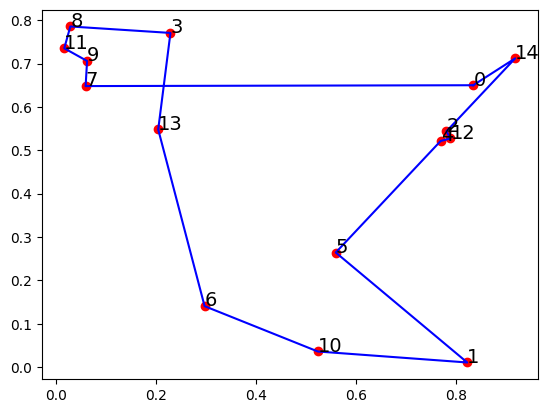




Итерация: 4000
Маршрут:  [ 7  9 11  8  3 13  6 10  1  5  4 12  2 14  0]
Качество маршрута: 2.612926496378408


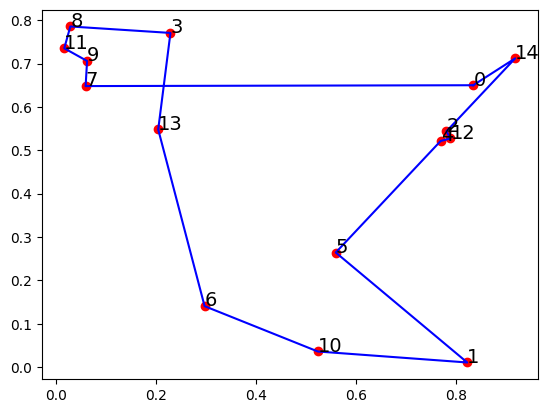




Итерация: 8000
Маршрут:  [ 7  9 11  8  3 13  6 10  1  5  4 12  2 14  0]
Качество маршрута: 2.612926496378408


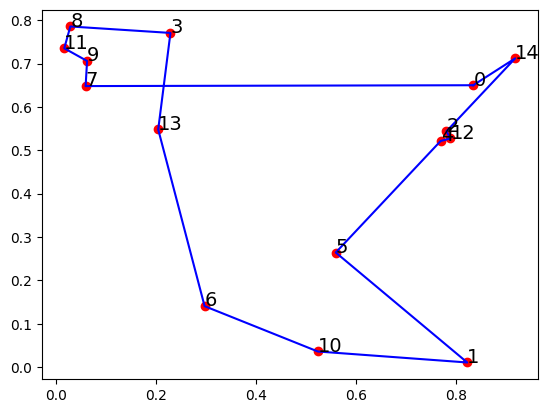




Итерация: 12000
Маршрут:  [ 7  9 11  8  3 13  6 10  1  5  4 12  2 14  0]
Качество маршрута: 2.612926496378408


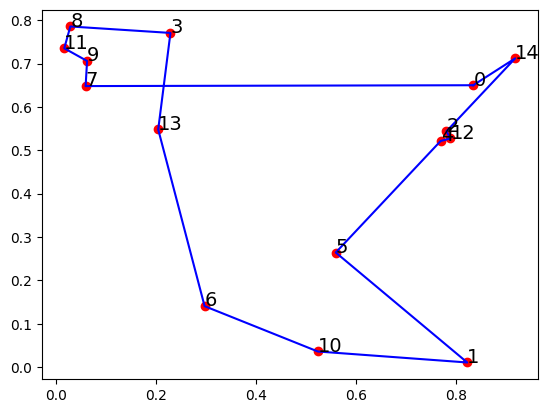




Итерация: 16000
Маршрут:  [ 7  9 11  8  3 13  6 10  1  5  4 12  2 14  0]
Качество маршрута: 2.612926496378408


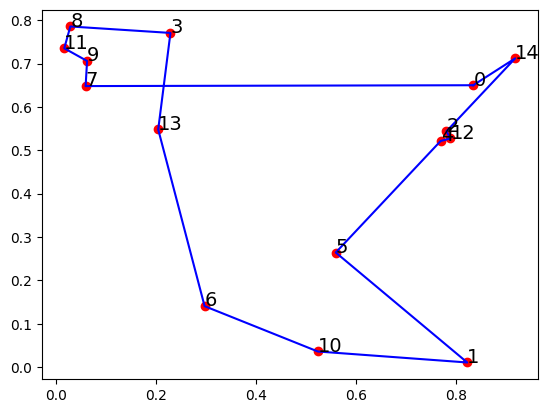

In [ ]:
from copy import deepcopy as dcopy

number_iterations = 20000

# Изначальная оценка
length_penalty = np.array(quality(list_cities, routes))

# 1. Сохраняем лучшую особь
best_route = dcopy(routes[np.argmin(length_penalty)])
best_length = length_penalty.min()

for i in range(number_iterations):
    sort_indx = length_penalty.argsort()
    length_penalty = length_penalty[sort_indx]
    routes = [routes[i] for i in sort_indx]

    route_index_1 = np.random.randint(number_routes)
    route_index_2 = np.random.randint(number_routes)

    if np.random.random() < 0.5:
        new_route = shuffle_mutation(dcopy(routes[route_index_1]))
    else:
        new_route = uniform_crossbreeding(
            dcopy(routes[route_index_1]),
            dcopy(routes[route_index_2])
        )

    new_length = route_length(list_cities, new_route)

    # Заменяем худшую особь новой
    routes[-1] = new_route
    length_penalty[-1] = new_length

    # 2. Обновляем элиту, если нашли лучшее решение
    if new_length < best_length:
        best_length = new_length
        best_route = dcopy(new_route)

    # 3. Гарантируем, что элита выживает — вставим обратно, если её вытеснили
    current_best_index = np.argmin(length_penalty)
    if best_length < length_penalty[current_best_index]:
        routes[-1] = dcopy(best_route)
        length_penalty[-1] = best_length

    if i % (number_iterations // 5) == 0:
        print("Итерация:", i)
        print("Маршрут: ", best_route)
        print("Качество маршрута:", best_length)
        route_image(list_cities, best_route)
        print('\n\n')


Выведем изображение итогового маршрута.

Маршрут:  [ 3  8 11  9  7 13  6 10  1  5  4 12  2 14  0]
Качество маршрута: 2.565281595772712


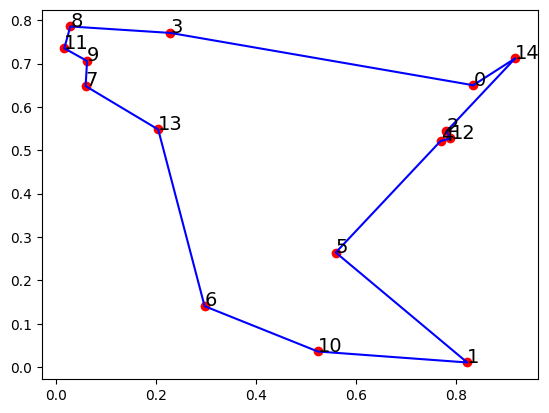

In [ ]:
length_penalty = quality(list_cities, routes)

min_route = routes[np.argmin(length_penalty)]
print("Маршрут: ", min_route)
print("Качество маршрута:", route_length(list_cities, min_route))
route_image(list_cities, min_route)

Генетический алгоритм позволяет решать множество различных оптимизационных и других задач. В результате данной работы мы рассмотрели реализацию данного алгоритма для задачи о коммивояжере.

Чтобы увеличить скорость и качество работы, генетический алгоритм может быть адаптирован под условия конкретной задачи, так можно изменять реализацию: генерации первого поколения, мутации, скрещивания, селекции, функции приспособленности, выбор особей для мутации и скрещивания, сохранение наиболее приспособленных особей без изменений (элитные особи) и многое другое.